## Import Library
* 자주 사용하는 기본적인 Library 읽기

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## Load Data

In [2]:
data = pd.read_csv("./Processed_data_final_ver2.csv")
X_data = data.drop(["label","label2"],axis=1)
y_data = data["label2"]

## Train - Test Split & Scaling

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, stratify=y_data, random_state=1004)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

## Grid Search

### SVM

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC()
parameter = {'kernel' : ['linear', 'rbf'], "C": [1, 10, 100, 1000], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4]}
grid_search = GridSearchCV(estimator= svm, param_grid=parameter, n_jobs=-1, cv=10)

In [9]:
grid_search.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

* SVM Test Score

In [ ]:
svm_test_score = grid_search.score(X_test_scaled, y_test)
print("SVM Test Score : {0}".format(svm_test_score))

* SVM Confussion Matrix

In [ ]:
import mglearn
# 오차행렬
plt.rcParams['figure.figsize'] = (10, 10) #figure size
plt.rcParams.update({'axes.labelsize': 'large'}) #axes label size

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, grid_search.predict(X_test_scaled)),xlabel='Predicted label',
    ylabel='Actual label', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cmap='Blues', fmt="%d")

plt.title("SVM Confusion Matrix", fontsize=18)
plt.gca().invert_yaxis()
plt.colorbar(scores_image)
plt.show()

In [13]:
result = grid_search.cv_results_
df_result = pd.DataFrame(result)
df_result.to_csv("./Result/svm_grid_result.csv", encoding="CP949", index=False)

SyntaxError: invalid syntax (<ipython-input-13-e632a6c2cd07>, line 3)

### Random Forest

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
parameter = {'n_estimators' : [100, 500, 1000], "class_weight" : ["balanced", "balanced_subsample", None]}
#parameter = {'n_estimators' : [100, 500, 1000], "class_weight" : [None]}
grid_search = GridSearchCV(estimator= random_forest, param_grid=parameter, n_jobs=-1, cv=10)

In [5]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

* Random Forest Test Score

In [6]:
rf_test_score = grid_search.score(X_test_scaled, y_test)
print("RF Test Score : {0}".format(rf_test_score))

RF Test Score : 0.8455334987593052


* Random Forest Confusion Matrix

C:\Users\user\Anaconda3\envs\emg\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\user\Anaconda3\envs\emg\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


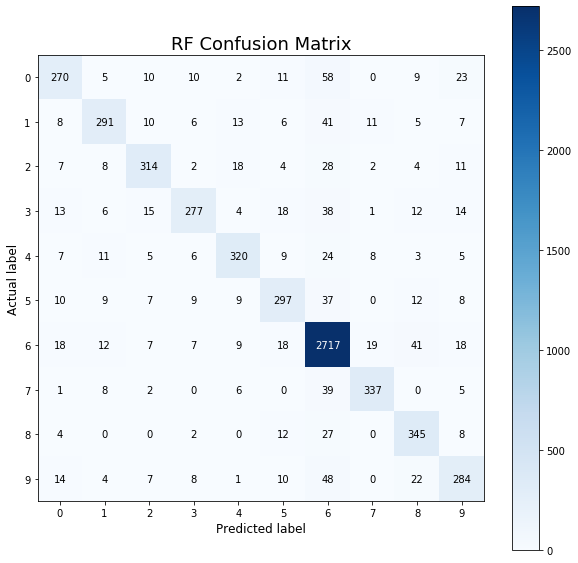

In [8]:
import mglearn
# 오차행렬
plt.rcParams['figure.figsize'] = (10, 10) #figure size
plt.rcParams.update({'axes.labelsize': 'large'}) #axes label size

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, grid_search.predict(X_test_scaled)),xlabel='Predicted label',
    ylabel='Actual label', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cmap='Blues', fmt="%d")

plt.title("RF Confusion Matrix", fontsize=18)
plt.gca().invert_yaxis()
plt.colorbar(scores_image)
plt.show()

In [ ]:
result = grid_search.cv_results_
df_result = pd.DataFrame(result)
df_result.to_csv("./Result/rf_grid_result.csv", encoding="CP949", index=False)

### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
parameter = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : [1, 1e-1, 1e-2, 1e-3, 1e-4], 
             'class_weight' : ['balanced', None], 'solver' : ['lbfgs', 'saga']}
grid_search = GridSearchCV(estimator= logistic, param_grid=parameter, n_jobs=-1, cv=10)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

* Logistic Regression Test Score

In [ ]:
logistic_test_score = grid_search.score(X_test_scaled, y_test)
print("LR Test Score : {0}".format(logistic_test_score))

* Logistic Regression Confusion Matrix

In [ ]:
import mglearn
# 오차행렬
plt.rcParams['figure.figsize'] = (10, 10) #figure size
plt.rcParams.update({'axes.labelsize': 'large'}) #axes label size

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, grid_search.predict(X_test_scaled)),xlabel='Predicted label',
    ylabel='Actual label', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cmap='Blues', fmt="%d")

plt.title("LR Confusion Matrix", fontsize=18)
plt.gca().invert_yaxis()
plt.colorbar(scores_image)
plt.show()

In [ ]:
result = grid_search.cv_results_
df_result = pd.DataFrame(result)
df_result.to_csv("./Result/lr_grid_result.csv", encoding="CP949", index=False)